# Introduction

This notebook will demonstrate the comparison of 3 machine learning models; Logistic regression, neural networks and Naive Bayes. These models will be on the Mushroom Classification Dataset, the goal is to predict with these models if a given mushroom is poisonous or edible.
We will take the steps necessary to optimize the models that lack precision or recall.
At the end we’ll conduct a comparison of these algorithms using appropriate metrics in order to come with the verdict of which model is best for our dataset.


# Importing Libraries

Presenting the used libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay


import warnings
warnings.filterwarnings('ignore')

# Loading Data

In [ ]:
df = pd.read_csv("dataset/mushrooms.csv")

In [ ]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Data Analysist

For this analysist, we have 23 features including the output column "class".
We created a countplotmultiple function to show multiple count plots within the same figures, this allows us to select the features that we want and demonstrate a side by side comparison.

In [ ]:
def countplotmultiple(df,n,cols):
  fig, axs = plt.subplots(1, n, figsize=(20,8), constrained_layout=True)
  i=0
  for col in cols:
    sns.countplot(df[col], data = df, ax=axs[i])
    i=i+1
  plt.show()

In [ ]:
# replacing output class labels
df["class"].replace({"e": "edible", "p": "poisonous"}, inplace= True)

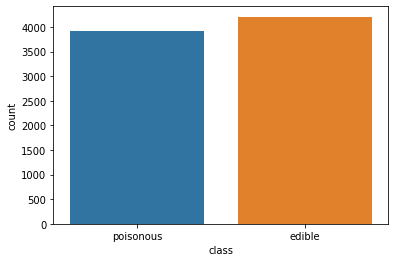

In [ ]:
sns.countplot(df["class"], data = df)

We can see that the data we have is perfectly balanced with almost 50% poisonous 50% edible mushrooms, this is great as we won't have to worry about balancing the dataset during preprocessing. This also means that the model will be able to make good prediction using Naive Bayes when we do model training later in this demonstration.

In [ ]:
# replacing cap features labels
df["cap-shape"].replace({"b": "bell", "c": "conical", "x": "convex", "f": "flat", "k": "knobbed", "s": "sunken"}, inplace= True)
df["cap-surface"].replace({"f": "fibrous", "g": "grooves", "y": "scaly", "s": "smooth"}, inplace= True)
df["cap-color"].replace({"n": "brown", "b": "buff", "c": "cinnamon", "g": "gray", "r": "green", "p": "pink", "u": "purple", "e": "red", "w": "white", "y": "yellow"}, inplace= True)

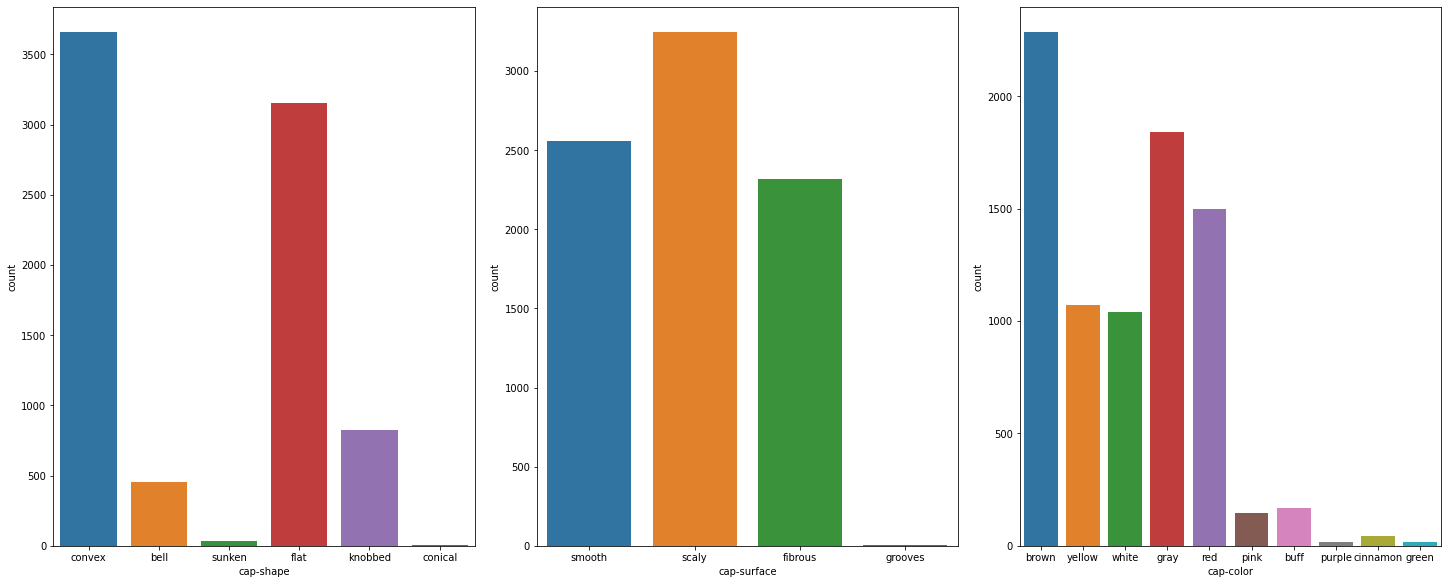

In [ ]:
countplotmultiple(df, 3,["cap-shape","cap-surface","cap-color"])

Here we can visualize the data and check the count plots for the cap features, that is shape, surface and color.


1. We can see that most of the mushrooms have either a convex or flat cap shape.
2. There are less mushrooms with grooves cap surface.
3. Most cap colors are brown.

Looking at these plots, we can ask ourselves some questions:
* Can we eliminate some of these feature and still have a good accuracy when training the model?






In [ ]:
# replacing bruises and odor features labels
df["bruises"].replace({"t": "bruises", "f": "no bruises"}, inplace= True)
df["odor"].replace({"a": "almond", "l": "anise", "c": "creosote",  "y": "fishy",  "f": "foul",  "m": "musty",  "n": "none",  "p": "pungent",  "s": "spicy"}, inplace= True)

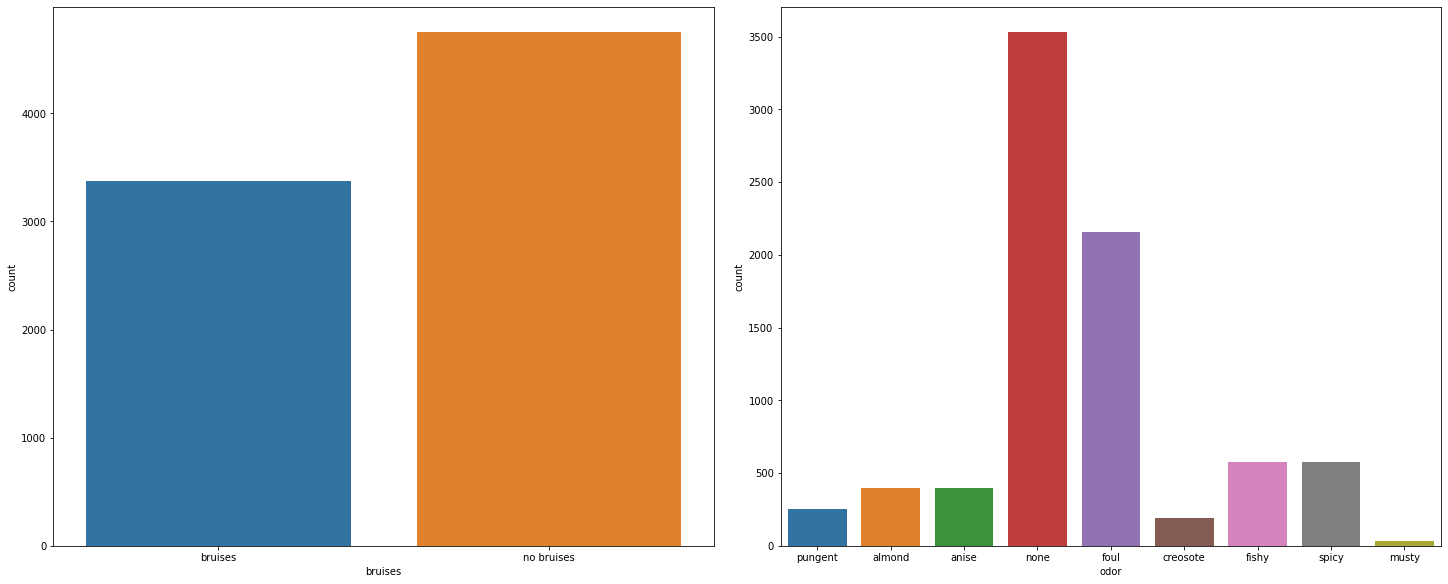

In [ ]:
countplotmultiple(df, 2,["bruises","odor"])

*Bruises*

Even though for the example we have mushrooms have mostly no bruises, we can see that there is an almost even distrubution for bruised/not bruised mushrooms in this dataset.


---
*Odor*

Most mushrooms have no odor but this feature will probably be of high importance to our model, as you can usually tell if a mushroom is edible or not knowing the odor, so this will affect our model and the training outcome.

In [ ]:
# replacing gill features labels
df["gill-attachment"].replace({"a": "attached", "d": "descending", "f": "free", "n": "notched"}, inplace= True)
df["gill-spacing"].replace({"c": "close", "w": "crowded", "d": "distant"}, inplace= True)
df["gill-size"].replace({"b": "broad", "n": "narrow"}, inplace= True)
df["gill-color"].replace({"k": "black", "n": "brown", "b": "buff", "h": "chocolate", "g": "gray", "r": "green", "o": "orange",
                          "p": "pink", "u": "purple", "e": "red", "w": "white", "y": "yellow"}, inplace= True)

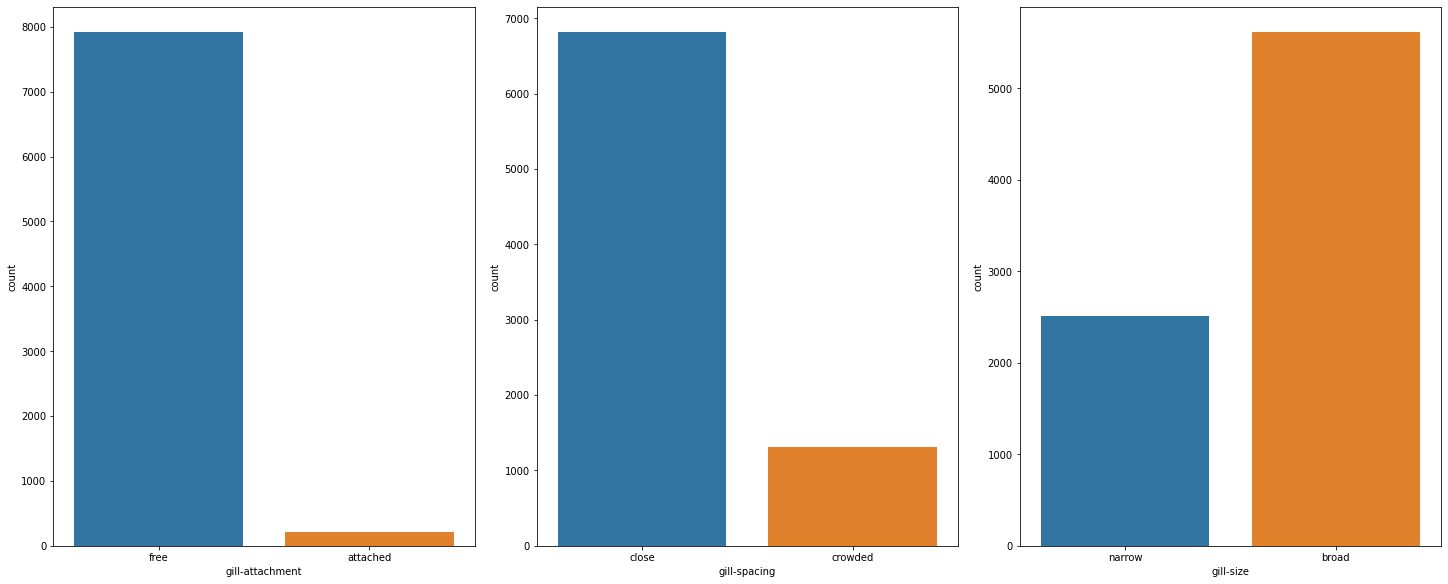

In [ ]:
countplotmultiple(df, 3,["gill-attachment","gill-spacing","gill-size"])



*   More mushrooms with free gill attachement, close gill spacing and broad gill size.
*   We can probably drop the gill-attachement feature to increase our training time but since we don't have many features we can keep it for this classification problem.



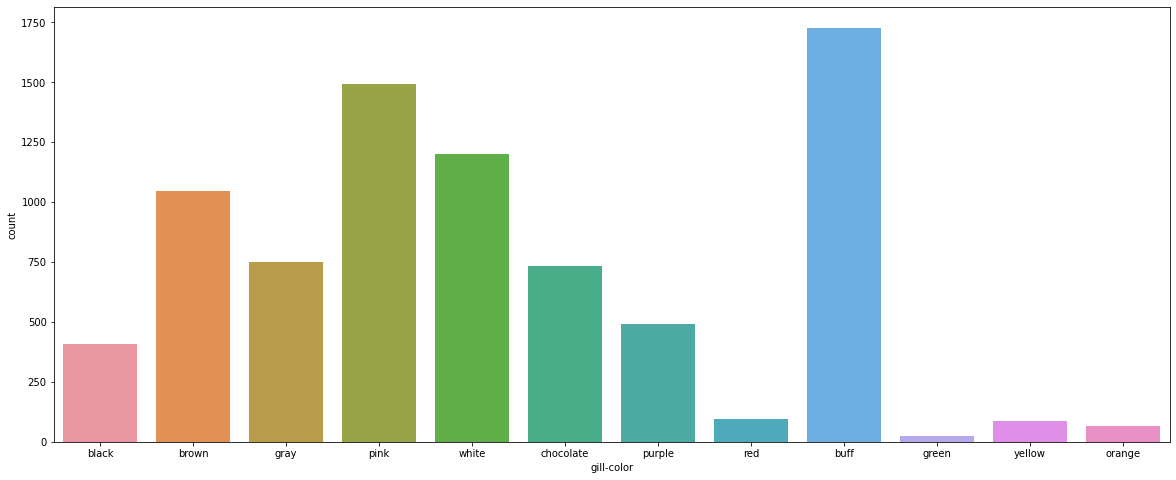

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.countplot(df["gill-color"], data = df, ax=ax)

In [ ]:
# replacing stalk features labels
df["stalk-shape"].replace({"e": "enlarging", "t": "tapering"}, inplace= True)
df["stalk-root"].replace({"b": "bulbous", "c": "club", "u": "cup", "e": "equal", "z": "rhizomorphs", "r": "rooted", "?": "missing"}, inplace= True)
df["stalk-surface-above-ring"].replace({"f": "fibrous", "y": "scaly", "k": "silky", "s": "smooth"}, inplace= True)
df["stalk-surface-below-ring"].replace({"f": "fibrous", "y": "scaly", "k": "silky", "s": "smooth"}, inplace= True)
df["stalk-color-above-ring"].replace({"n": "brown", "b": "buff", "c": "cinnamon", "g": "gray", "o": "orange", "p": "pink", "e": "red", "w": "white", "y": "yellow"}, inplace= True)
df["stalk-color-below-ring"].replace({"n": "brown", "b": "buff", "c": "cinnamon", "g": "gray", "o": "orange", "p": "pink", "e": "red", "w": "white", "y": "yellow"}, inplace= True)

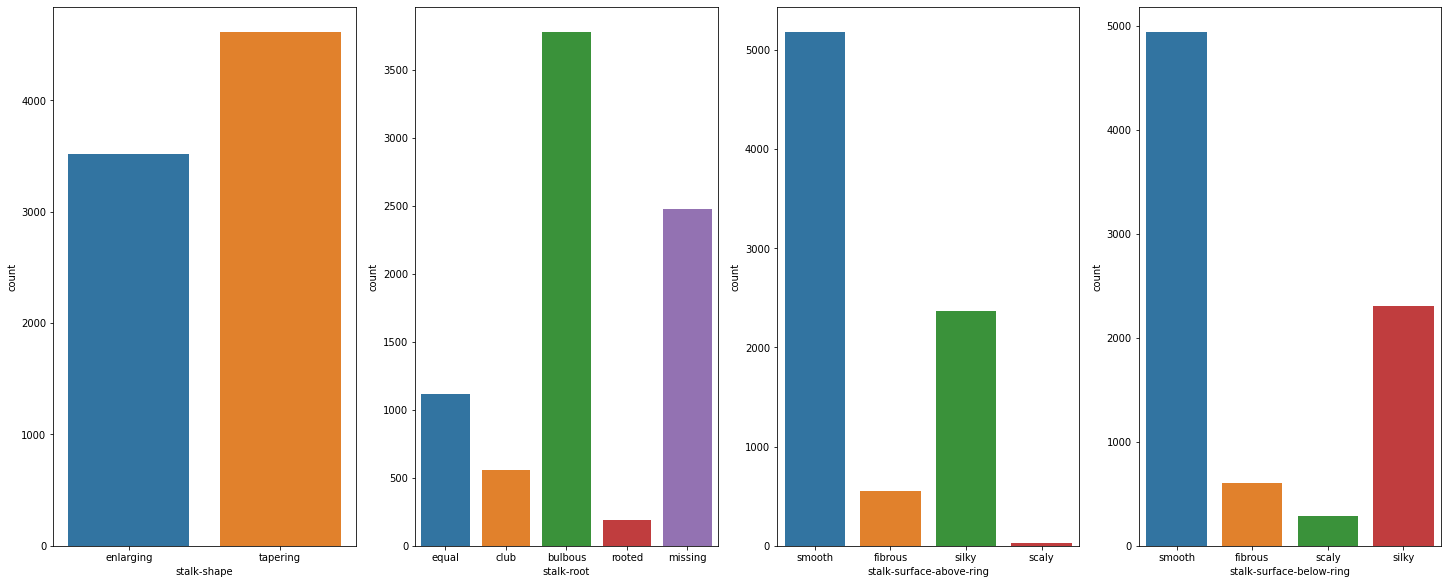

In [ ]:
countplotmultiple(df, 4,["stalk-shape","stalk-root","stalk-surface-above-ring","stalk-surface-below-ring"])

During this experiment we had the option to use one hot encoding to make the features continuous, if we were to do that we will end up with 119 feature.

*   This would certainly increase the training time but we can drop features with low relavence to have faster training time.
*   stalk surface above ring, scaly: as the number of examples is too low we can drop the feature in that case.


---

***Stalk surface above/below ring***

*   We can see that stalk surface is mostly smooth/silky whether it's above or below the ring hence this could be relavant to the training and obtaining good results.


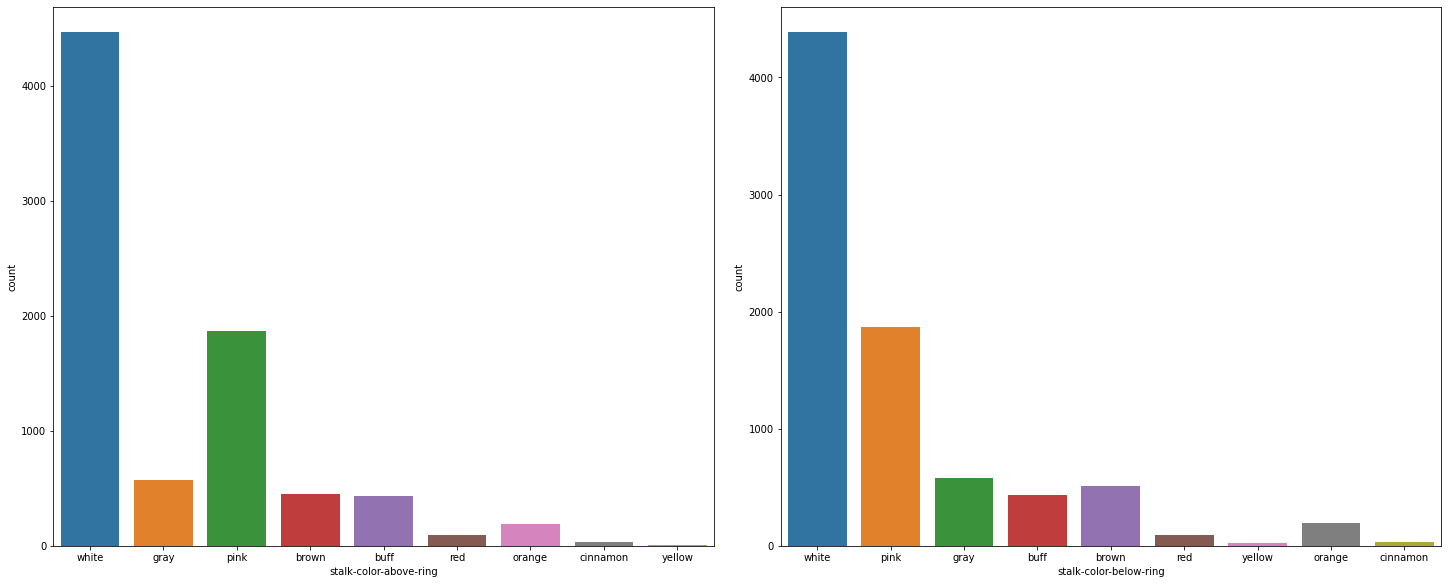

In [ ]:
countplotmultiple(df, 2,["stalk-color-above-ring","stalk-color-below-ring"])

We can see here that there is not much difference for stalk colors above and below the ring.

In [ ]:
# replacing veil features labels
df["veil-type"].replace({"p": "partial", "u": "universal"}, inplace= True)
df["veil-color"].replace({"n": "brown", "o": "orange", "w": "white", "y": "yellow"}, inplace= True)

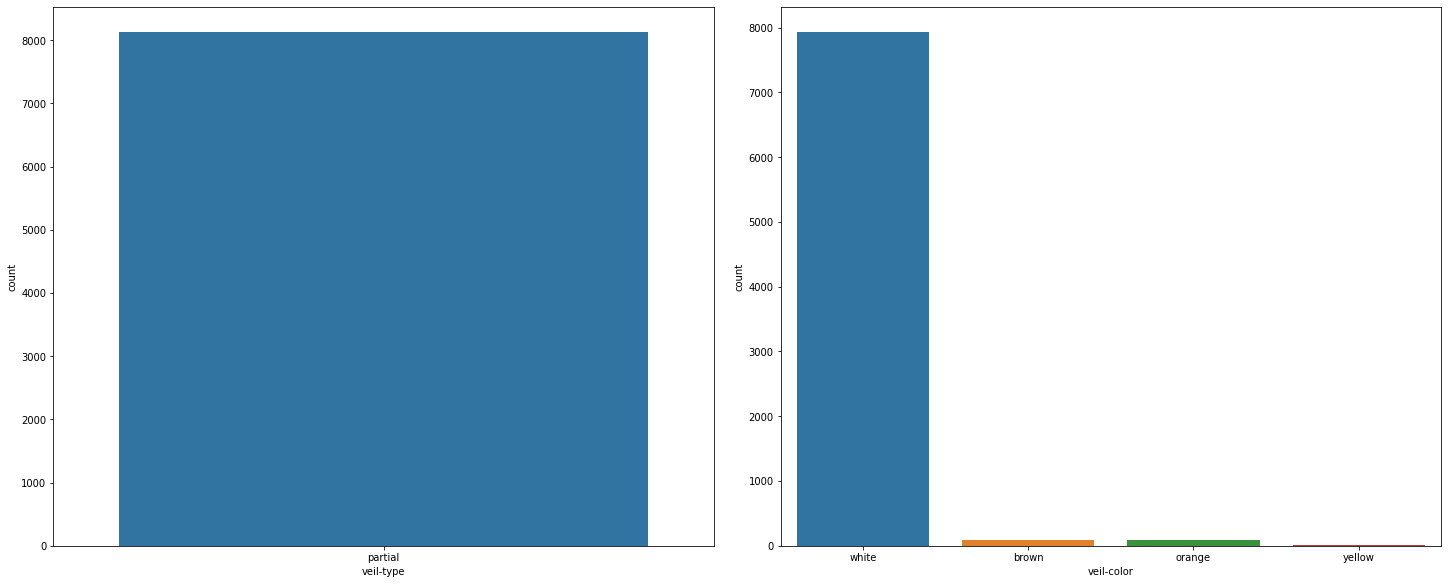

In [ ]:
countplotmultiple(df, 2,["veil-type","veil-color"])



*   It's important to note that all veil types in this dataset are partial, this means that we can 100% drop this attribute since it's constant.


*   This also applies to veil-color since most veils are white, this is a quasi-constant features that we can maybe drop to optimize our model.


*   If we shift our interest to feature selection, using VarianceThreshold will also show us constant/quasi-constant features that we can eliminate.

In [ ]:
# replacing population and habitat features labels
df["population"].replace({"a": "abundant", "c": "clustered", "n": "numerous", "s": "scattered", "v": "several", "y": "solitary"}, inplace= True)
df["habitat"].replace({"g": "grasses", "l": "leaves", "m": "meadows", "p": "paths", "u": "urban", "w": "waste", "d": "woods"}, inplace= True)

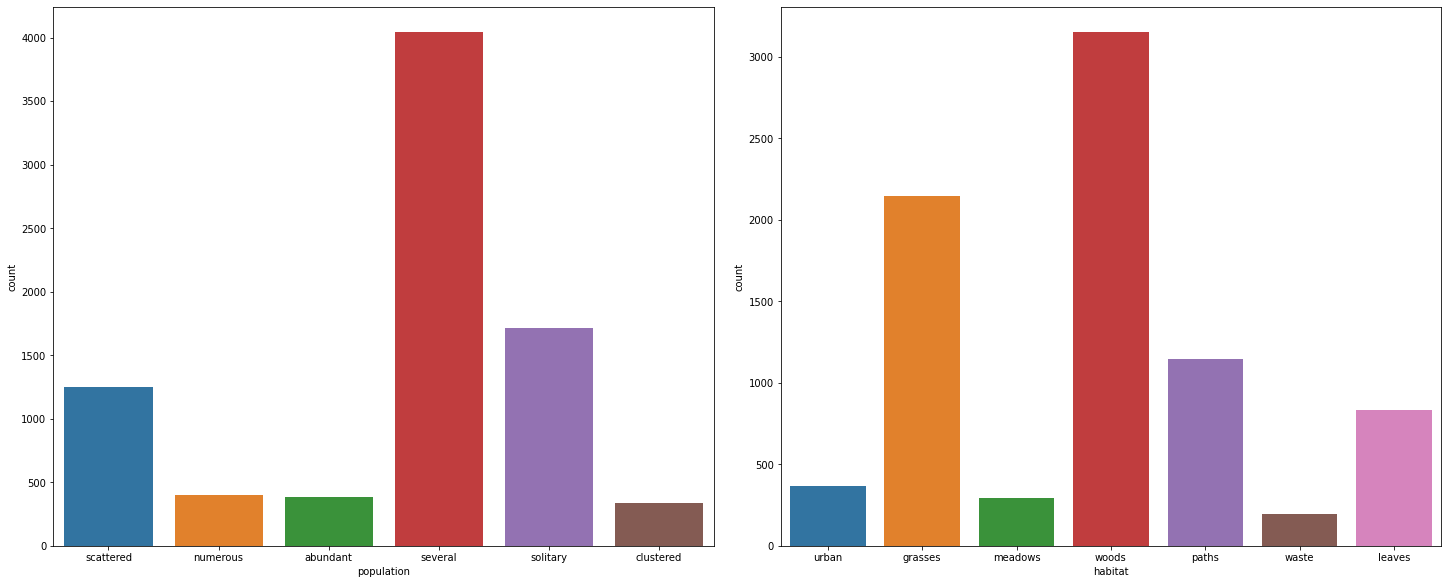

In [ ]:
countplotmultiple(df, 2,["population","habitat"])

1.   Population and habitat are likely to be very important features for this supervised learning classification problem.

2.   In this experiment, there is not a feature that will determine whether or not the mushroom is edible, this is a binary classification where all the feature contribute to the results.




# Preprocessing

First, we will check if we have any missing values in the daya, we can see that there are none. so this dataframe is good to go.

In [ ]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Using a label encoder, we were able to transform our data from character labels to numerical.

In [ ]:
encoder = LabelEncoder()
df = df.apply(LabelEncoder().fit_transform)
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,2,3,0,0,7,1,0,1,0,...,3,7,7,0,2,1,4,2,3,4
1,0,2,3,9,0,0,1,0,0,0,...,3,7,7,0,2,1,4,3,2,0
2,0,0,3,8,0,1,1,0,0,1,...,3,7,7,0,2,1,4,3,2,2
3,1,2,2,8,0,7,1,0,1,1,...,3,7,7,0,2,1,4,2,3,4
4,0,2,3,3,1,6,1,1,0,0,...,3,7,7,0,2,1,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,4,3,0,1,6,0,0,0,11,...,3,4,4,0,1,1,4,0,1,1
8120,0,2,3,0,1,6,0,0,0,11,...,3,4,4,0,0,1,4,0,4,1
8121,0,3,3,0,1,6,0,0,0,1,...,3,4,4,0,1,1,4,0,1,1
8122,1,4,2,0,1,3,1,0,1,2,...,2,7,7,0,2,1,0,7,4,1


We seprate the data into input features X and 1 output feature y "class" 1 for poisonous and 0 for edible.

In [ ]:
y = df['class']
X = df.drop('class', axis=1)

Using train test split, we will perform a Cross-Validation to be able to evaluate and compare learning algorithms by dividing data into two segments:


*   One used to learn or train a model.
*   The other used to validate the model.



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,
                                                    random_state=25)

# Model Selection & Training

## Building Naive Bayes Classifier

First, we calculate the percentage of data points belonging to the mentioned class.

In [ ]:
def priorProbability(y_train, label):
    
    totalpts = y_train.shape[0]
    classpts = np.sum(y_train == label)
    
    return classpts/float(totalpts)

In the next function, we will calculate the conditional probability.

In [ ]:
def conditionalProbability(X_train, y_train, feat_col, feat_val, label):
    
    X_new = X_train[y_train == label]
    
    num = np.sum(X_new[feat_col] == feat_val)
    denom = np.sum(y_train == label)
    result = num/float(denom)
    
    return result

The last function is to calculate the posterior probability and make predictions.

In [ ]:
def predict(X_train, y_train, xtest):
    
    classes = np.unique(y_train)

    features = [x for x in X_train.columns]
    
    post_probs = []
    
    for label in classes:
        
        likelihood = 1.0
        
        for f in features:
            likelihood *= conditionalProbability(X_train, y_train, f, xtest[f], label)

        posterior = priorProbability(y_train, label) * likelihood
        
        post_probs.append(posterior)

    prediction = np.argmax(post_probs)
    
    return prediction   

## Gaussian Naive Bayes

In [ ]:
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

GaussianNB()

## Logistic Regression

In [ ]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

## Multi-Layer Perceptron

In [ ]:
nn_model = MLPClassifier(hidden_layer_sizes=(128, 128))
nn_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(128, 128))

# Evaluation

Accuracy score function is to check the results on the test data and calculate an accuracy score for the naive bayes classifier.

In [ ]:
def accuracy_score(X_train, y_train, xtest, ytest):
    
    preds = []
    
    for i in range(xtest.shape[0]):
        pred_label = predict(X_train, y_train, xtest.iloc[i])
        preds.append(pred_label)
        
    preds = np.array(preds)
    
    accuracy = np.sum(preds == ytest)/ytest.shape[0]
    
    return accuracy

In [ ]:
print(f"Naive Bayes accuracy:", accuracy_score(X_train, y_train, X_test, y_test))
print(f"Gaussian Naive Bayes accuracy: {gnb_model.score(X_test, y_test)}")
print(f"Logistic Regression accuracy: {log_model.score(X_test, y_test)}")
print(f"Neural Network accuracy: {nn_model.score(X_test, y_test)}")

Naive Bayes accuracy: 0.9950769230769231
Gaussian Naive Bayes accuracy: 0.8646153846153846
Logistic Regression accuracy: 0.9587692307692308
Neural Network accuracy: 1.0


# Optimization

In [ ]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=25)

In [ ]:
log_model.fit(X_train, y_train)
print(f"Logistic Regression: {log_model.score(X_test, y_test)}")

Logistic Regression: 0.963076923076923


In [ ]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['newton-cg','liblinear'],
    'max_iter' : [100]
    }
]

In [ ]:
clf = GridSearchCV(log_model, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_train,y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


In [ ]:
best_clf.best_estimator_

LogisticRegression(C=0.0001, penalty='none', solver='newton-cg')

In [ ]:
print(f"Logistic Regression accuracy: {best_clf.score(X_test, y_test)}" + "%")

Logistic Regression accuracy: 0.9723076923076923%


# Visualization & Result analysis

##  1.Precision vs Recall Analysis

### Precesion-Recall Curve using Logistic Regression

These are the results of the precision vs recall curve when using the logistic regression model

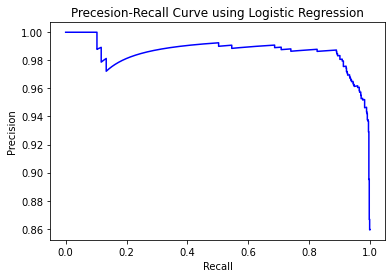

In [ ]:
#using logistic regression model to make predictions
y_score = log_model.predict_proba(X_test)[:, 1]

prec, recall, thresholds = precision_recall_curve(y_test,y_score)

fig, ax = plt.subplots()
ax.plot( recall, prec, color='blue')
ax.set_title('Precesion-Recall Curve using Logistic Regression')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

plt.show()

### Precesion-Recall Curve using Optimized Logistic Regression

Precison vs recall curve for the optimized logistic regression model .We notice that the precison improves a little but the recal is overall the same.

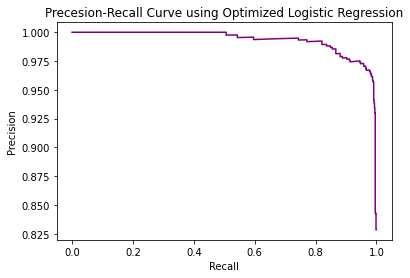

In [ ]:
#using the optimized logistic regression model to make predictions
y_score = best_clf.predict_proba(X_test)[:, 1]

prec, recall, thresholds = precision_recall_curve(y_test,y_score)

fig, ax = plt.subplots()
ax.plot( recall, prec, color='purple')
ax.set_title('Precesion-Recall Curve using Optimized Logistic Regression')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

plt.show()

### Precesion-Recall Curve using Neural Networks

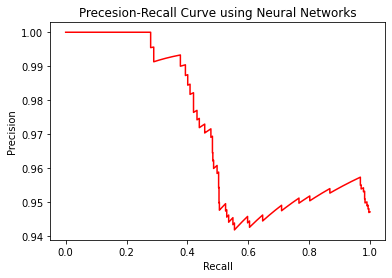

In [ ]:
#use neural network model to make predictions
y_score = nn_model.predict_proba(X_test)[:, 1]

prec, recall, thresholds = precision_recall_curve(y_test,y_score)

fig, ax = plt.subplots()
ax.plot( recall, prec, color='red')
ax.set_title('Precesion-Recall Curve using Neural Networks')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

plt.show()

### Precesion-Recall Curve using Gaussian Naive Bayes

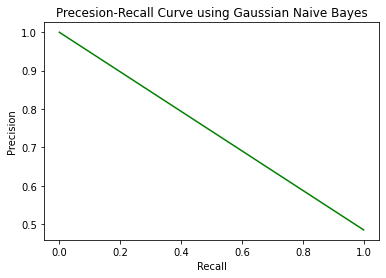

In [ ]:
y_score = gnb_model.predict_proba(X_test)[:, 1]

prec, recall, thresholds = precision_recall_curve(y_test,y_score)

fig, ax = plt.subplots()
ax.plot( recall, prec, color='green')
ax.set_title('Precesion-Recall Curve using Gaussian Naive Bayes')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

plt.show()

## 2.Correct Count Analysis

We will determine which model did better by visualizing the amount of predictions that were made correctly vs. made incorrectly by each model. And to help us visualize the results, we will build a pandas DataFrame, that we can use to help us make the plot with seaborn.

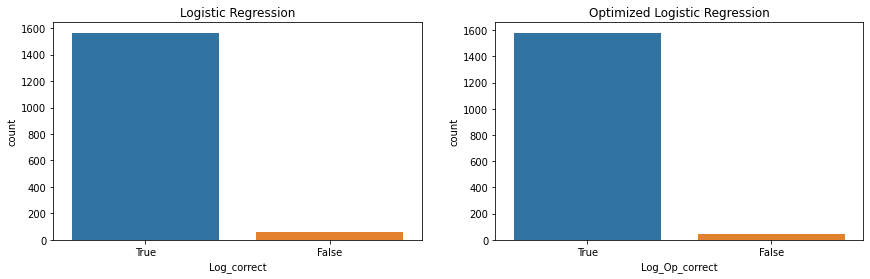

In [ ]:
y_score = log_model.predict(X_test)

result_df = pd.DataFrame()
result_df['y_test'] = np.array(y_test)
result_df['Log_pred'] = y_score
result_df['Log_correct'] = result_df['Log_pred'] == result_df['y_test']

fig, ax = plt.subplots(1,2)
plt.subplots_adjust(right=2)
sns.countplot(x=result_df['Log_correct'], order=[True,False], ax=ax[0]).set_title('Logistic Regression')

y_scoreOp = best_clf.predict(X_test)

result_df['Log_Op_pred'] = y_scoreOp
result_df['Log_Op_correct'] = result_df['Log_Op_pred'] == result_df['y_test']

sns.countplot(x=result_df['Log_Op_correct'], order=[True,False], ax=ax[1]).set_title('Optimized Logistic Regression')
fig.show()



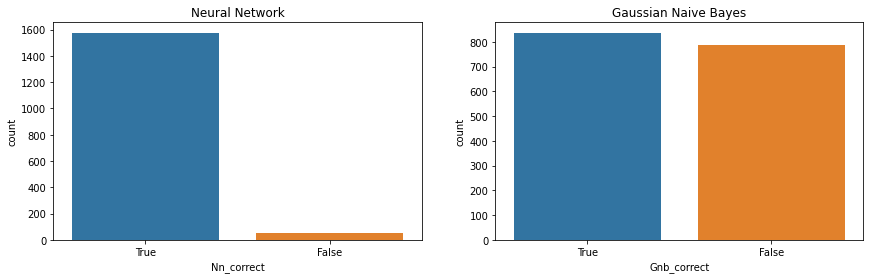

In [ ]:
y_score = nn_model.predict(X_test)

result_df = pd.DataFrame()
result_df['y_test'] = np.array(y_test)
result_df['Nn_pred'] = y_score
result_df['Nn_correct'] = result_df['Nn_pred'] == result_df['y_test']

fig, ax = plt.subplots(1,2)
plt.subplots_adjust(right=2)
sns.countplot(x=result_df['Nn_correct'], order=[True,False], ax=ax[0]).set_title('Neural Network')

y_scoreGnb = gnb_model.predict(X_test)

result_df['Gnb_pred'] = y_scoreGnb
result_df['Gnb_correct'] = result_df['Gnb_pred'] == result_df['y_test']

sns.countplot(x=result_df['Gnb_correct'], order=[True,False], ax=ax[1]).set_title('Gaussian Naive Bayes')

fig.show()



# References

*   Splitting dataset into train/test splits: 

https://towardsdatascience.com/how-to-split-a-dataset-into-training-and-testing-sets-b146b1649830

*   Feature selection:

https://scikit-learn.org/stable/modules/feature_selection.html

*   Ordinal encoder to change features to float/integer values:

https://medium.com/nerd-for-tech/removing-constant-variables-feature-selection-463e2d6a30d9

*   MLP & Regression:

https://www.youtube.com/watch?v=7E7tl6rm7VM

*   Optimization:

https://www.youtube.com/watch?v=pooXM9mM7FU

*   HyperParameters Tuning:

https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c

https://towardsdatascience.com/dont-sweat-the-solver-stuff-aea7cddc3451

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

*   Visualization and Graph plotting:

https://scikit-plot.readthedocs.io/en/stable/

